In [1]:
import glob
import os

import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

# Extract, transform, and load
## List input files
Each file is the result of an experiment to measure p-values for genes based on CRISPR knock-out experiments. The data in question has been generated to protect the innocent from getting scooped :)

In [2]:
! ls src

ADAM21P1.mageck.gene_summary.txt  MITD1.mageck.gene_summary.xlsx
C17orf75.mageck.gene_summary.txt  PRSS23.mageck.gene_summary.txt
CCDC182.mageck.gene_summary.txt   README.md
IER2.mageck.gene_summary.txt	  USF3.mageck.gene_summary.txt
MIR1226.mageck.gene_summary.xlsx  build.yml
MIR651.mageck.gene_summary.xlsx


## Determine format of .txt files

In [3]:
! head -n 2 src/*.txt

==> src/ADAM21P1.mageck.gene_summary.txt <==
HGNC ID	gene symbol	gene name	sample1ADAM21P1	sample2ADAM21P1	sample3ADAM21P1	sample4ADAM21P1	sample5ADAM21P1
HGNC:5	A1BG	alpha-1-B glycoprotein	18.226613537110033	10.218157099862001	4.7125916598230635	0.0	0.0

==> src/C17orf75.mageck.gene_summary.txt <==
HGNC ID	gene symbol	gene name	sample1C17orf75	sample2C17orf75	sample3C17orf75	sample4C17orf75	sample5C17orf75
HGNC:5	A1BG	alpha-1-B glycoprotein	3.420857894122199	8.419757691792395	0.4426361927267658	2.828236637711006	1.3482269749045757

==> src/CCDC182.mageck.gene_summary.txt <==
HGNC ID	gene symbol	gene name	sample1CCDC182	sample2CCDC182	sample3CCDC182	sample4CCDC182	sample5CCDC182
HGNC:5	A1BG	alpha-1-B glycoprotein	3.407627479996347	0.5941259127389221	3.7533059689147956	11.154486911353901	0.934778908209137

==> src/IER2.mageck.gene_summary.txt <==
HGNC ID	gene symbol	sample1IER2	sample2IER2	sample3IER2	sample4IER2	sample5IER2
HGNC:5	A1BG	0.42540434235759195	13.747819613641239	7.521735699

## Convert TSV files to data frames

In [4]:
def txt2df(mydict={}):
    for file in glob.glob('./src/*.txt'):
        #store dataframes under key that is filename
        mydict[os.path.basename(file)] = pd.DataFrame.from_csv(file, sep='\t')
    return mydict

%time dfs = txt2df()

CPU times: user 714 ms, sys: 112 ms, total: 826 ms
Wall time: 853 ms


## Convert XLSX files to dataframes

In [5]:
def xls2df(mydict={}):
    for file in glob.glob('./src/*.xlsx'):
        # add to existing dfs dictionary, keying on filename
        mydict[os.path.basename(file)] = pd.read_excel(file)
        
%time xls2df(dfs)

CPU times: user 11.4 s, sys: 304 ms, total: 11.7 s
Wall time: 12 s


In [6]:
dfs.keys()

dict_keys(['ADAM21P1.mageck.gene_summary.txt', 'C17orf75.mageck.gene_summary.txt', 'CCDC182.mageck.gene_summary.txt', 'IER2.mageck.gene_summary.txt', 'PRSS23.mageck.gene_summary.txt', 'USF3.mageck.gene_summary.txt', 'MIR1226.mageck.gene_summary.xlsx', 'MIR651.mageck.gene_summary.xlsx', 'MITD1.mageck.gene_summary.xlsx'])

# Analysis
Join all of the experimental data on a common key (in this case 'gene id').

## Join data across all data frames on a common key

In [7]:
def easy_join():
    joined = None
    last_col = None
    for k in dfs.keys():
        atbat = dfs[k]
        if type(joined) == type(None):
            joined = atbat
        else:
            joined = pd.merge(joined, atbat, how='inner', left_on='gene symbol', right_on='gene symbol')
    return joined
            
sjoin = easy_join()

In [8]:
sjoin

,gene symbol,gene name_x,sample1ADAM21P1,sample2ADAM21P1,sample3ADAM21P1,sample4ADAM21P1,sample5ADAM21P1,gene name_y,sample1C17orf75,sample2C17orf75,...,sample3MIR651,sample4MIR651,sample5MIR651,HGNC ID,gene name_y,sample1MITD1,sample2MITD1,sample3MITD1,sample4MITD1,sample5MITD1
0,A1BG,alpha-1-B glycoprotein,18.226614,10.218157,4.712592,0.0,0.0,alpha-1-B glycoprotein,3.420858,8.419758,...,5.382959,0.692474,0.047169,HGNC:5,alpha-1-B glycoprotein,0.307316,1.943585,6.332429,0.523408,10.879836
1,A1BG-AS1,A1BG antisense RNA 1,12.526714,1.042367,2.234951,0.0,0.0,A1BG antisense RNA 1,4.313881,6.641984,...,4.520113,4.169063,1.726014,HGNC:37133,A1BG antisense RNA 1,0.769178,8.894499,9.628424,0.593206,13.168855
2,A1CF,APOBEC1 complementation factor,8.133934,1.185602,1.312188,0.0,0.0,APOBEC1 complementation factor,4.833159,9.351405,...,4.549998,14.139011,2.857384,HGNC:24086,APOBEC1 complementation factor,2.742899,6.163184,4.755459,0.507408,4.669828
3,A2M,alpha-2-macroglobulin,2.749890,5.970543,3.433607,0.0,0.0,alpha-2-macroglobulin,4.039728,11.215144,...,2.500973,0.898541,2.592131,HGNC:7,alpha-2-macroglobulin,2.911426,2.842082,1.909246,0.342344,14.320230
4,A2M-AS1,A2M antisense RNA 1 (head to head),0.193079,13.274621,4.838645,0.0,0.0,A2M antisense RNA 1 (head to head),3.424955,10.880986,...,4.529668,11.914650,7.644605,HGNC:27057,A2M antisense RNA 1 (head to head),0.065769,4.267570,4.215133,1.028074,2.108315
5,A2ML1,alpha-2-macroglobulin like 1,14.195792,2.852422,0.135649,0.0,0.0,alpha-2-macroglobulin like 1,5.049729,4.272881,...,6.376689,10.541031,7.094979,HGNC:23336,alpha-2-macroglobulin like 1,0.223544,3.251097,10.011737,1.713231,17.558779
6,A2ML1-AS1,A2ML1 antisense RNA 1,18.346146,8.533391,4.024038,0.0,0.0,A2ML1 antisense RNA 1,1.026516,8.268509,...,0.312652,13.177264,3.423042,HGNC:41022,A2ML1 antisense RNA 1,3.772329,4.248872,7.005797,0.585576,10.999028
7,A2ML1-AS2,A2ML1 antisense RNA 2,1.024482,7.522366,0.290403,0.0,0.0,A2ML1 antisense RNA 2,3.370181,4.009405,...,4.596661,9.382356,3.469485,HGNC:41523,A2ML1 antisense RNA 2,0.174777,1.085034,10.442154,1.799016,17.215161
8,A2MP1,alpha-2-macroglobulin pseudogene 1,10.791435,2.121101,2.809063,0.0,0.0,alpha-2-macroglobulin pseudogene 1,2.274733,3.365821,...,3.114110,3.138258,7.051113,HGNC:8,alpha-2-macroglobulin pseudogene 1,0.204580,2.804518,8.911245,0.517699,15.638537
9,A3GALT2,"alpha 1,3-galactosyltransferase 2",5.630112,5.295359,2.953891,0.0,0.0,"alpha 1,3-galactosyltransferase 2",3.119393,4.157333,...,7.237116,2.191066,4.177552,HGNC:30005,"alpha 1,3-galactosyltransferase 2",4.495417,7.625583,8.539572,0.738201,9.573814


## Visualize

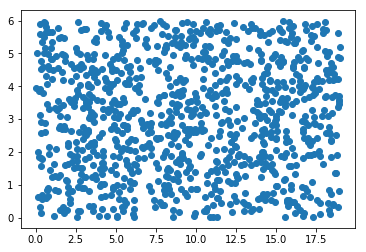

In [9]:
sample = sjoin.sample(1000) # this is random data; sample otherwise it will just be a solid block of dots
plt.scatter(sample['sample1ADAM21P1'], sample['sample1C17orf75'])